# Info 370 HW 05

Name: Ella Kim   

*Citations are hyperlinked*

## Is Beijing more expensive than Seattle?
#### 1

In [131]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import ttest_ind

#load in data
df_bs_abnb = pd.read_csv('/home/jovyan/lost+found/INFO_370/beijing-seattle-airbnb-price.csv.bz2', sep="\t", usecols = ["city", "price"])

#sanity checks
# print # cols
cols = df_bs_abnb.shape[1]
print("Number of columns: " + str(cols))
# print # rows
rows = df_bs_abnb.shape[0]
print("Number of rows: " + str(rows))
df_bs_abnb.head(5) #sanity check
# make df of total count of nulls in each col & print results
df_nulls = df_bs_abnb.isnull().sum()
print("\nNumber of nulls in each column: \n" + str(df_nulls))

Number of columns: 2
Number of rows: 995

Number of nulls in each column: 
city     0
price    0
dtype: int64


#### 2

In [132]:
# filter for separate data sets for each city
df_seattle = df_bs_abnb[df_bs_abnb.city == "Seattle"]
df_beijing = df_bs_abnb[df_bs_abnb.city == "Beijing"]

# define a function to print summary statistics (just for efficiency)
def printStats(df):
    print("\nMean: " + str(df.price.mean()))
    print("Median: " + str(df.price.median()))
    print("Standard Deviation: " + str(df.price.std()))
    print("Range: " + str(df.price.max() - df.price.min()) + "\n")

# compute summary statistics
print("Seattle summary statistics: ")
printStats(df_seattle)
print("Beijing summary statistics: ")
printStats(df_beijing)

Seattle summary statistics: 

Mean: 210.64661654135338
Median: 149.0
Standard Deviation: 244.3357941629997
Range: 972

Beijing summary statistics: 

Mean: 365.2921810699589
Median: 296.0
Standard Deviation: 274.22086621736156
Range: 4020



For how different the ranges are, the standard deviations are similar, and just from these statistics one would say that it is more expensive to live in Beijing, as the mean and medians are much higher for Beijing. 

#### 3

Seattle prices: 


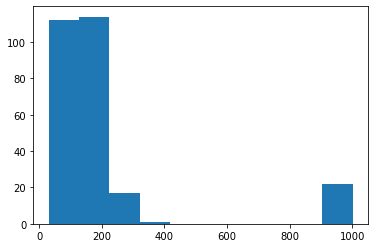

Seattle ln prices


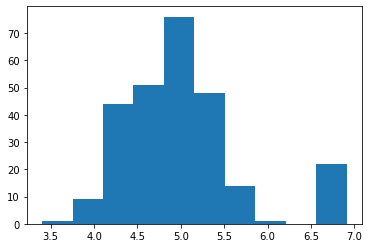

In [133]:
# plot Seattle price and log_price
print("Seattle prices: ")
plt.hist(df_seattle.price)
plt.show()
print("Seattle ln prices")
plt.hist(np.log(df_seattle.price))
plt.show()

As seen above, the original prices for Seattle were very right skewed, with another large node in what could be considered outliers. The log-normal graph looks significantly more like a normal distribution, with the exeption of the 2nd node at 6.5-7.0 similar to the original price histogram. 

Beijing prices: 


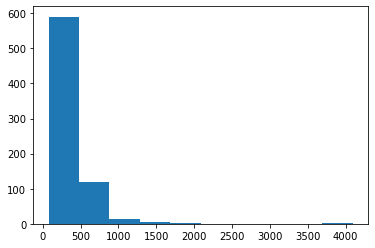

Beijing ln prices


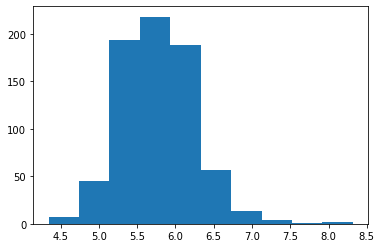

In [134]:
# plot Beijing price and log_price
print("Beijing prices: ")
plt.hist(df_beijing.price)
plt.show()
print("Beijing ln prices")
plt.hist(np.log(df_beijing.price))
plt.show()

Also seen above, Beijing has a similar skewed distribution (exponential) like Seattle, except that the outlier-like values do not have as large of a frequency, which is also reflective in the log-normal graph that is again more normal-like than the original price. 

#### 4

In [135]:
# convert prices to ln prices
ln_seattle = np.log(df_seattle.price)
ln_beijing = np.log(df_beijing.price)

#### 5

In [136]:
# compute and print mean difference between Beij. & Seat. 
mean_difference = ln_beijing.values.mean() - ln_seattle.values.mean()
print("Mean difference between Beijing and Seattle: " + str(mean_difference))

Mean difference between Beijing and Seattle: 0.7391737097578659


#### 6

In [137]:
# H0: mu_beijing = mu_seattle, or mu_beijing - mu_seattle = 0
# combine log-normal prices
ln_bs = ln_seattle.append(ln_beijing)

# compute overall mean and std from above series
print("Overall mean: " + str(ln_bs.values.mean()))
print("Overall standard deviation: " + str(ln_bs.values.std()))

Overall mean: 5.56379230780986
Overall standard deviation: 0.6413183689687626


#### 7

In [138]:
# make fake beijing with mean & std same to above, and length of ln_beijing observations
fake_b = np.random.normal(ln_bs.values.mean(), scale=ln_bs.values.std(), size = len(ln_beijing))
# fake_b #sanity check 

# make fake seattle with mean & std same to above, and length of ln_beijing observations
fake_s = np. random.normal(ln_bs.values.mean(), scale=ln_bs.values.std(), size = len(ln_seattle))
# fake_s #sanity check 

print("Mean difference between fakes: " + str(np.mean(fake_b) - np.mean(fake_s)))

Mean difference between fakes: 0.02994000382076134


#### 8

In [139]:
# repeat of #7 but for large trials (R = 1000)
mean_diff = []
for n in range(0, 1000):
    curr_b = np.random.normal(ln_bs.values.mean(), scale=ln_bs.values.std(), size = len(ln_beijing))
    curr_s = np. random.normal(ln_bs.values.mean(), scale=ln_bs.values.std(), size = len(ln_seattle))
    mean_diff.append(np.mean(curr_b) - np.mean(curr_s))

len(mean_diff) #sanity check to check there are 1000 mean differences

1000

#### 9

In [140]:
# compute & print mean of mean diff.
print("Mean of the mean differences: " + str(np.mean(mean_diff)))

Mean of the mean differences: 0.0011812745832861299


A mean of mean differences near 0 is expected. When inspecting the mean_diff list, there are both postive and negative means all less than 1 (abs value). Theoretically, if there is no difference between the prices in country there should be a 0 difference between the two means, which is why we see an almost 0 value in a random sample of a finite number of trials. 

#### 10

In [141]:
print("Largest mean difference (abs value): " + str(np.max(np.abs(mean_diff))))
# just judging from this max value, it is wayyy lower than the real mean difference between beijing and seattle...

Largest mean difference (abs value): 0.14136787423500063


#### 11

In [142]:
mean_diff_array = np.array(mean_diff) # convert to array first 

# find 2.5 & 97.5th percentile 
lower = np.percentile(mean_diff_array, 2.5)
higher = np.percentile(mean_diff_array, 97.5)

# print results
print("95% confidence interval: (" + str(lower) + ", " + str(higher) + ")")

95% confidence interval: (-0.08519944793538715, 0.09278236600887357)


The actual mean difference between Beijing and Seattle (0.7391737097578659) is significantly higher than the max value in the CI, so no it does not fall into the CI.

#### 12

Based on the simulations above, the observed difference is not a random fluke: prices in Beijing really are more expensive than in Seattle.

## Now repeat the above with t-test
#### 1

In [143]:
var_b = np.var(ln_beijing)
var_s = np.var(ln_seattle)
std_error = math.sqrt((var_s/len(ln_seattle))+(var_b/len(ln_beijing)))
print("Standard error: " + str(std_error))

Standard error: 0.046252703014433454


#### 2

In [144]:
# df = 266 -1 = 265
t_cr = 1.97 # 0.05 two tail with df 265

# compute CI for actual value and check if 0 is in interval
lower_t = mean_difference - t_cr * std_error
higher_t = mean_difference + t_cr * std_error
print("95% confidence interval: (" + str(lower_t) + ", " + str(higher_t) + ")")

95% confidence interval: (0.648055884819432, 0.8302915346962998)


As taken in Hint 3, I compute 95% CI around the actual value, and check of H0 value 0 fits in there: 0 is much less than the lower interval value, so it does not fit in the 95% CI.

#### 3

Based on the CI from #2, I can reject H_0 (Beijing and Seattle are equally expensive) at the 5% level. 

#### 4

In [145]:
# compute t with formula in directions
t = mean_difference / std_error
print("T-value: " + str(t))

T-value: 15.981200266873094


#### 5

As there is no table that has a t-value ~15.98, I would follow the pattern that, if this is for the same df (so constant degree of freedom), the two tail percent has to be almost 0% to near t = ~15.98 (i.e. MUCH less than 1%)

## Use canned t-test function
#### 1

In [146]:
# t-test with python function
print("Test results: ")
print(ttest_ind(ln_beijing, ln_seattle, equal_var=False))

Test results: 
Ttest_indResult(statistic=15.954061957013737, pvalue=7.439441804547704e-44)


#### 2

Conclusion: Beijing is more expensive than Seattle.  
As seen in the conclusions for simulations and 95% CI, the corresponding values being tested (actual mean difference for simulations, hypothetical 0 for 95% CI) never fell between the CIs, so the H_0 was rejected. Again, as seen directly above, python's t-test shows a p-value less than 0.05 (is actually much smaller), which agrees with the other two methods to reject the null hypothesis. 